# **1. Setup & Quick Data Overview**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')  # Titanic dataset
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

------
.head() previews data

.info() shows data types & missing values

.describe() summarizes numeric stats

isnull().sum() identifies missing-data hotspots

-----
## Findings: 
- Expect missing Age, Cabin, Embarked. Confirm count of rows (891), columns (12).

# **2. Handling Missing**


In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'Age' values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to many missing values
df.drop('Cabin', axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\VARMA\AppData\Local\Temp\ipykernel_14552\3405429660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\VARMA\AppData\Local\Temp\ipykernel_14552\3405429660.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **3. Univariate Analysis**

- Analyze individual variables to understand their distributions

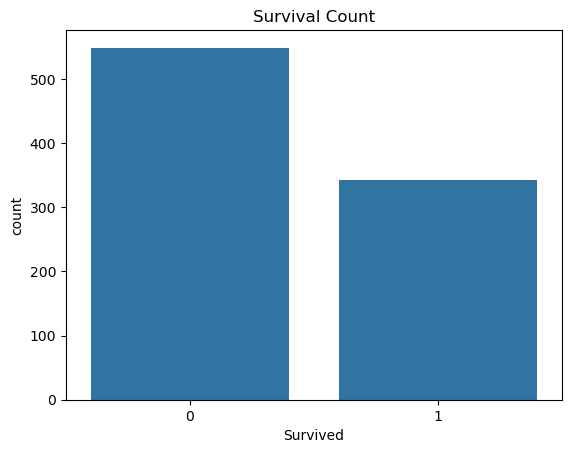

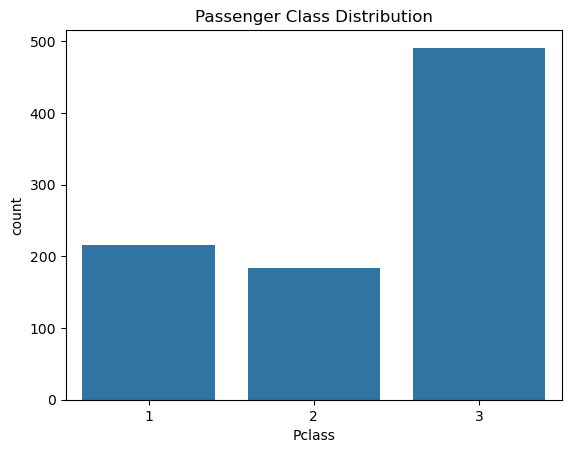

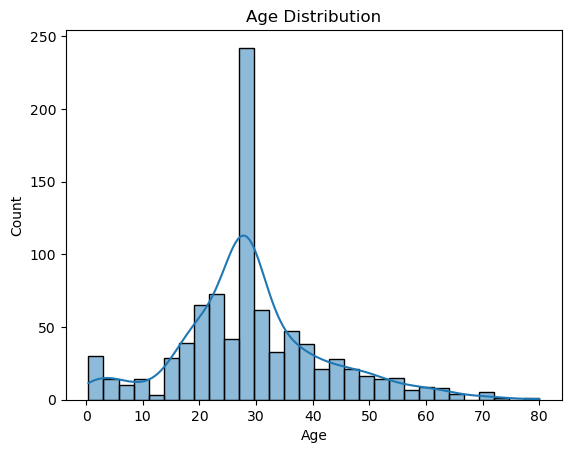

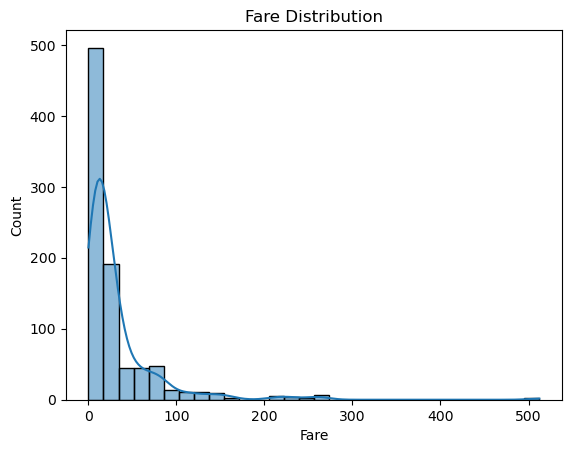

In [13]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


# **. Bivariate Analysis**

- Explore relationships between pairs of variables

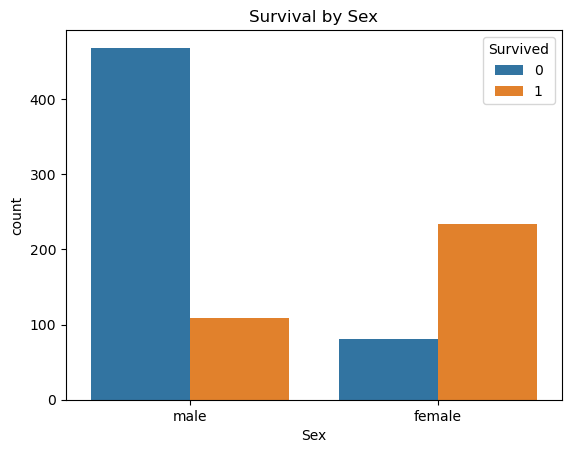

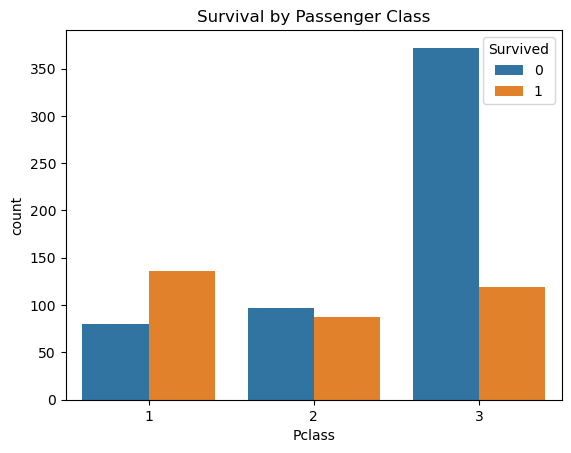

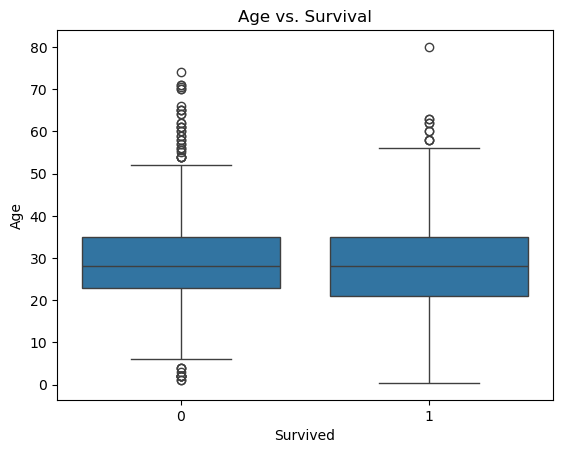

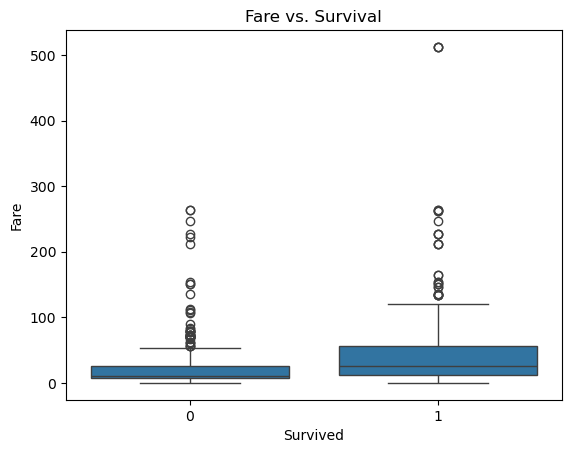

In [17]:
# Survival by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Age vs. survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs. Survival')
plt.show()

# Fare vs. survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs. Survival')
plt.show()


# **4. Feature Engineering**

In [34]:
# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone' feature
df['IsAlone'] = 1  # Initialize to 1 (True)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 (False) if FamilySize > 1

# Convert 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked_S'], drop_first=True)
df

C:\Users\VARMA\AppData\Local\Temp\ipykernel_14552\2756481623.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 (False) if FamilySize > 1
C:\Users\VARMA\AppData\Local\Temp\ipykernel_14

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Embarked_Q_True,Embarked_S_True
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,2,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,2,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,1,1,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,2,0,False,True
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,1,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",NaN,27.0,0,0,211536,13.0000,1,1,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,19.0,0,0,112053,30.0000,1,1,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,28.0,1,2,W./C. 6607,23.4500,4,0,False,True
889,890,1,1,"Behr, Mr. Karl Howell",NaN,26.0,0,0,111369,30.0000,1,1,False,False


# **5. Correlation Analysis**

- Assess correlations between numerical features

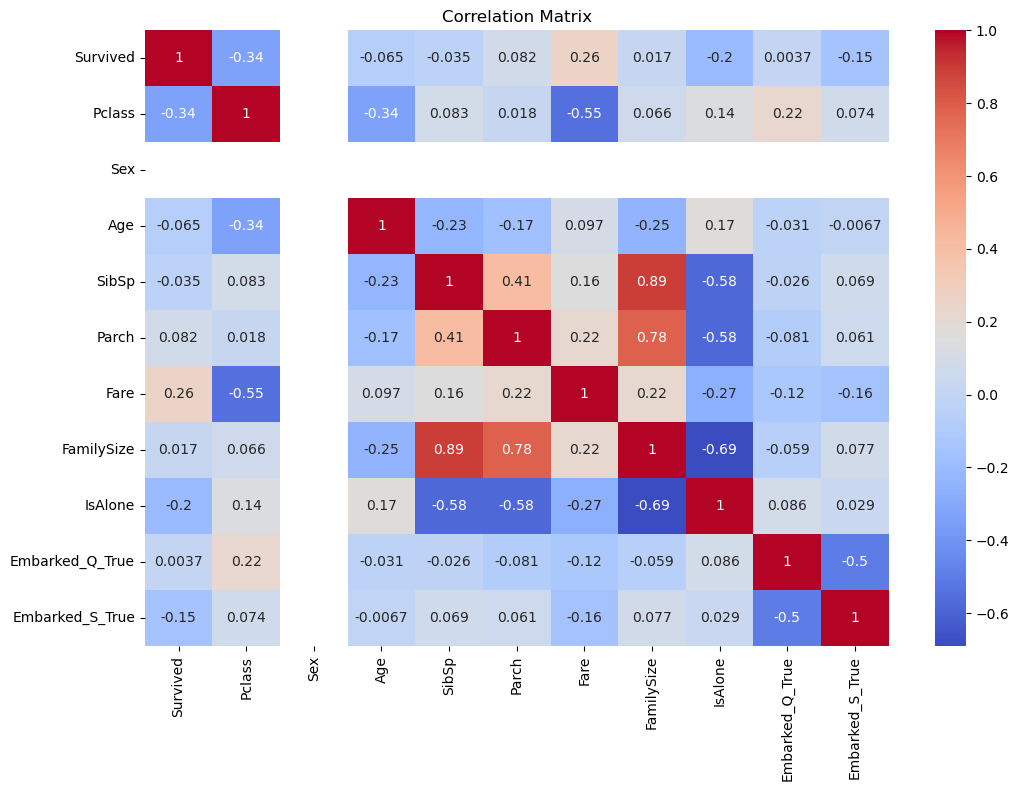

In [52]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 6. Prepare Data for Modeling

- Finalize the dataset for machine learning models

In [48]:
# Drop unnecessary columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


In [50]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q_True,Embarked_S_True
0,0,3,NaN,22.0,1,0,7.2500,2,0,False,True
1,1,1,NaN,38.0,1,0,71.2833,2,0,False,False
2,1,3,NaN,26.0,0,0,7.9250,1,1,False,True
3,1,1,NaN,35.0,1,0,53.1000,2,0,False,True
4,0,3,NaN,35.0,0,0,8.0500,1,1,False,True
